Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego
sygnału 𝑠[𝑛] = 𝐴 (𝑛 𝑚𝑜𝑑 𝑁) / 𝑁 o amplitudzie 𝐴 = 3 i okresie podstawowym 𝑁 = 11. W tym celu dla każdej
wartości 𝑁0 ∈ {0, 𝑁, 4𝑁, 9𝑁} wykreślić widmo amplitudowe i fazowe sygnału 𝑠[𝑛] dopełnionego 𝑁0
zerami. Skomentować otrzymane wyniki

In [5]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

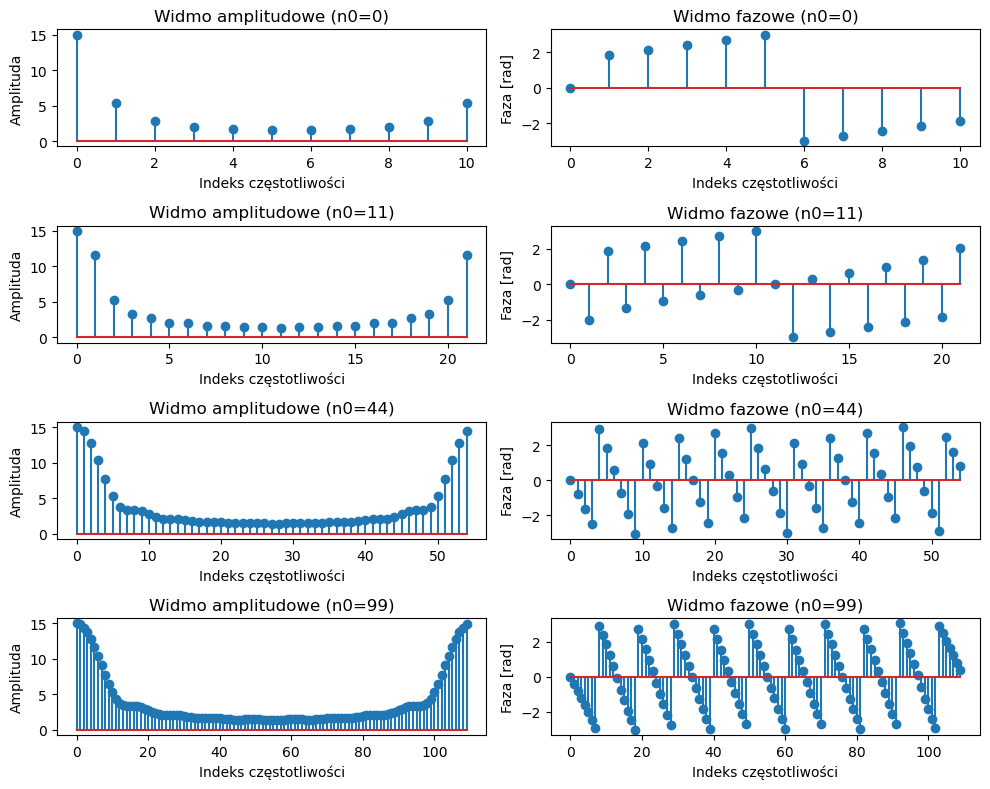

In [6]:
N = 11
A = 3
signal = lambda n: A * (n % N) / N

n = np.arange(N)
N0 = [0, 1 * N, 4 * N, 9 * N]

def calc_spectrum(signal):
    return fft(signal)

def calc_amplitude_spectrum(signal):
    return np.abs(calc_spectrum(signal))


def calc_phase_spectrum(signal):
    angles = np.angle(calc_spectrum(signal))

    zero_angles = abs(angles) < 0.01
    angles *= ~zero_angles

    return angles


fig, axes = plt.subplots(len(N0), 2, figsize=(10, 8))


for i, n0 in enumerate(N0):
    calculated_signal = signal(n)
    for _ in range(n0):
        calculated_signal = np.append(calculated_signal, 0)

    amplitude_spectrum = calc_amplitude_spectrum(calculated_signal)
    phase_spectrum = calc_phase_spectrum(calculated_signal)


    axes[i, 0].stem(amplitude_spectrum)
    axes[i, 0].set_title(f"Widmo amplitudowe (n0={n0})")
    axes[i, 0].set_xlabel("Indeks częstotliwości")
    axes[i, 0].set_ylabel("Amplituda")

    axes[i, 1].stem(phase_spectrum)
    axes[i, 1].set_title(f"Widmo fazowe (n0={n0})")
    axes[i, 1].set_xlabel("Indeks częstotliwości")
    axes[i, 1].set_ylabel("Faza [rad]")

plt.tight_layout()
plt.show()

**Wniosek:** Dopełnienie zerami poprawia rozdzielczość widma, ale nie wpływa na zmianę charakterystyki częstotliwościowej. Poprawa rozdzielczości może ukazać odmienny kształt wykresu, co widać po widmach fazowych. Początkowo zagęszczenie słupków na wykresie było małe, co w połączeniu z funkcją modulo, a zatem pewną okresowością, może nie ukazywać pełni wykresu.